In [26]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests
import csv

In [28]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [30]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [33]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [37]:
# Loop through all the cities in our list.
# for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

    # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lasa
Processing Record 2 of Set 1 | turbat
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | lagoa
Processing Record 5 of Set 1 | morgan city
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | barra do garcas
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | half moon bay
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | chandbali
Processing Record 

Processing Record 36 of Set 4 | picos
Processing Record 37 of Set 4 | aksu
Processing Record 38 of Set 4 | tanout
Processing Record 39 of Set 4 | flin flon
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | zarubino
Processing Record 42 of Set 4 | general pico
Processing Record 43 of Set 4 | camacupa
Processing Record 44 of Set 4 | xuddur
Processing Record 45 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 46 of Set 4 | poronaysk
Processing Record 47 of Set 4 | igrim
Processing Record 48 of Set 4 | meyungs
City not found. Skipping...
Processing Record 49 of Set 4 | russell
Processing Record 50 of Set 4 | talavera
Processing Record 1 of Set 5 | lata
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | adrar
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | lezajsk
Processing Record 7 of Set 5 | mwinilunga
Processing Record 8 of Set 5 | skagastrond
City not fo

Processing Record 28 of Set 8 | beringovskiy
Processing Record 29 of Set 8 | energetik
Processing Record 30 of Set 8 | elizabeth city
Processing Record 31 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 8 | pimentel
Processing Record 33 of Set 8 | mecca
Processing Record 34 of Set 8 | maragogi
Processing Record 35 of Set 8 | krasnoselkup
Processing Record 36 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 8 | stolin
Processing Record 38 of Set 8 | amahai
Processing Record 39 of Set 8 | pandan
Processing Record 40 of Set 8 | comodoro rivadavia
Processing Record 41 of Set 8 | chapais
Processing Record 42 of Set 8 | mercedes
Processing Record 43 of Set 8 | tautira
Processing Record 44 of Set 8 | tunduru
City not found. Skipping...
Processing Record 45 of Set 8 | rovaniemi
Processing Record 46 of Set 8 | spearfish
Processing Record 47 of Set 8 | sorvag
City not found. Skipping...
Processing Record 48 of Set 8 | thinadhoo
Processing Reco

Processing Record 14 of Set 12 | sinkat
City not found. Skipping...
Processing Record 15 of Set 12 | san luis
Processing Record 16 of Set 12 | arman
Processing Record 17 of Set 12 | kingaroy
Processing Record 18 of Set 12 | borovoy
Processing Record 19 of Set 12 | cherdyn
Processing Record 20 of Set 12 | grenfell
Processing Record 21 of Set 12 | raudeberg
Processing Record 22 of Set 12 | uwayl
City not found. Skipping...
Processing Record 23 of Set 12 | porto novo
Processing Record 24 of Set 12 | cukai
Processing Record 25 of Set 12 | honningsvag
Processing Record 26 of Set 12 | kavarna
Processing Record 27 of Set 12 | yelizovo
Processing Record 28 of Set 12 | kavaratti
Processing Record 29 of Set 12 | kaohsiung
Processing Record 30 of Set 12 | tigil
Processing Record 31 of Set 12 | dunedin
Processing Record 32 of Set 12 | krasnokamensk
Processing Record 33 of Set 12 | camacha
Processing Record 34 of Set 12 | komsomolskiy
Processing Record 35 of Set 12 | kamenka
Processing Record 36 of

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lasa,46.6166,10.7002,31.37,69,44,8.25,IT,2022-01-28 21:57:29
1,Turbat,26.0023,63.0440,62.51,67,0,1.48,PK,2022-01-28 21:57:30
2,Rikitea,-23.1203,-134.9692,78.06,70,100,15.64,PF,2022-01-28 21:54:59
3,Lagoa,39.0500,-27.9833,57.78,57,87,12.59,PT,2022-01-28 21:57:30
4,Morgan City,29.6994,-91.2068,57.00,30,0,20.71,US,2022-01-28 21:53:52
5,Ponta Do Sol,32.6667,-17.1000,61.72,62,68,7.49,PT,2022-01-28 21:57:31
6,Dikson,73.5069,80.5464,3.24,94,100,18.63,RU,2022-01-28 21:57:31
7,Ancud,-41.8697,-73.8203,80.13,62,0,9.53,CL,2022-01-28 21:57:31
8,Kapaa,22.0752,-159.3190,79.12,59,3,3.00,US,2022-01-28 21:56:05
9,Isangel,-19.5500,169.2667,80.71,89,100,4.61,VU,2022-01-28 21:57:32


In [43]:
print(city_data)

[{'City': 'Lasa', 'Lat': 46.6166, 'Lng': 10.7002, 'Max Temp': 31.37, 'Humidity': 69, 'Cloudiness': 44, 'Wind Speed': 8.25, 'Country': 'IT', 'Date': '2022-01-28 21:57:29'}, {'City': 'Turbat', 'Lat': 26.0023, 'Lng': 63.044, 'Max Temp': 62.51, 'Humidity': 67, 'Cloudiness': 0, 'Wind Speed': 1.48, 'Country': 'PK', 'Date': '2022-01-28 21:57:30'}, {'City': 'Rikitea', 'Lat': -23.1203, 'Lng': -134.9692, 'Max Temp': 78.06, 'Humidity': 70, 'Cloudiness': 100, 'Wind Speed': 15.64, 'Country': 'PF', 'Date': '2022-01-28 21:54:59'}, {'City': 'Lagoa', 'Lat': 39.05, 'Lng': -27.9833, 'Max Temp': 57.78, 'Humidity': 57, 'Cloudiness': 87, 'Wind Speed': 12.59, 'Country': 'PT', 'Date': '2022-01-28 21:57:30'}, {'City': 'Morgan City', 'Lat': 29.6994, 'Lng': -91.2068, 'Max Temp': 57, 'Humidity': 30, 'Cloudiness': 0, 'Wind Speed': 20.71, 'Country': 'US', 'Date': '2022-01-28 21:53:52'}, {'City': 'Ponta Do Sol', 'Lat': 32.6667, 'Lng': -17.1, 'Max Temp': 61.72, 'Humidity': 62, 'Cloudiness': 68, 'Wind Speed': 7.49, 'C

In [47]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,2022-01-28 21:57:29,46.6166,10.7002,31.37,69,44,8.25
1,Turbat,PK,2022-01-28 21:57:30,26.0023,63.0440,62.51,67,0,1.48
2,Rikitea,PF,2022-01-28 21:54:59,-23.1203,-134.9692,78.06,70,100,15.64
3,Lagoa,PT,2022-01-28 21:57:30,39.0500,-27.9833,57.78,57,87,12.59
4,Morgan City,US,2022-01-28 21:53:52,29.6994,-91.2068,57.00,30,0,20.71
5,Ponta Do Sol,PT,2022-01-28 21:57:31,32.6667,-17.1000,61.72,62,68,7.49
6,Dikson,RU,2022-01-28 21:57:31,73.5069,80.5464,3.24,94,100,18.63
7,Ancud,CL,2022-01-28 21:57:31,-41.8697,-73.8203,80.13,62,0,9.53
8,Kapaa,US,2022-01-28 21:56:05,22.0752,-159.3190,79.12,59,3,3.00
9,Isangel,VU,2022-01-28 21:57:32,-19.5500,169.2667,80.71,89,100,4.61


In [49]:
import csv
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

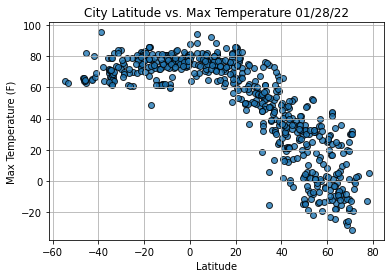

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

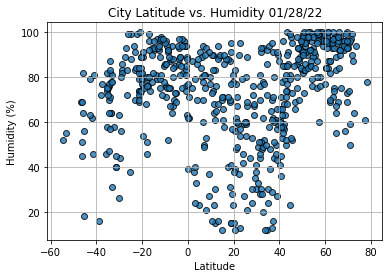

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

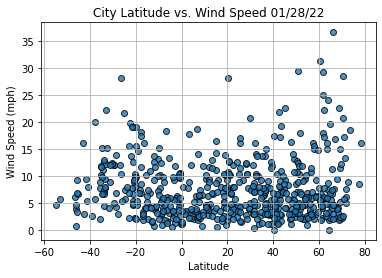

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [60]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lasa,IT,2022-01-28 21:57:29,46.6166,10.7002,31.37,69,44,8.25
1,Turbat,PK,2022-01-28 21:57:30,26.0023,63.0440,62.51,67,0,1.48
3,Lagoa,PT,2022-01-28 21:57:30,39.0500,-27.9833,57.78,57,87,12.59
4,Morgan City,US,2022-01-28 21:53:52,29.6994,-91.2068,57.00,30,0,20.71
5,Ponta Do Sol,PT,2022-01-28 21:57:31,32.6667,-17.1000,61.72,62,68,7.49


In [61]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Rikitea,PF,2022-01-28 21:54:59,-23.1203,-134.9692,78.06,70,100,15.64
7,Ancud,CL,2022-01-28 21:57:31,-41.8697,-73.8203,80.13,62,0,9.53
9,Isangel,VU,2022-01-28 21:57:32,-19.5500,169.2667,80.71,89,100,4.61
10,Ushuaia,AR,2022-01-28 21:57:32,-54.8000,-68.3000,64.06,52,40,4.61
11,Barra Do Garcas,BR,2022-01-28 21:53:32,-15.8900,-52.2567,74.10,93,47,4.12


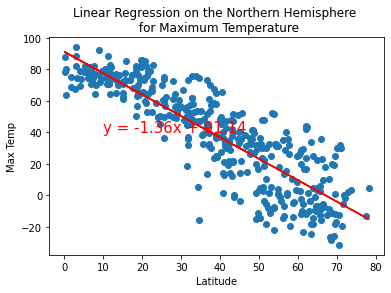

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

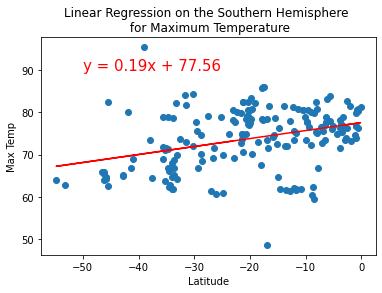

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

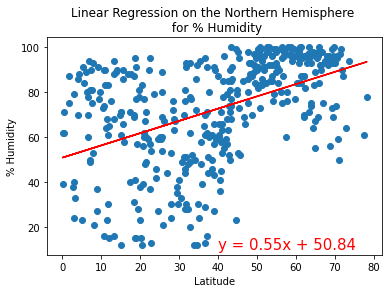

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

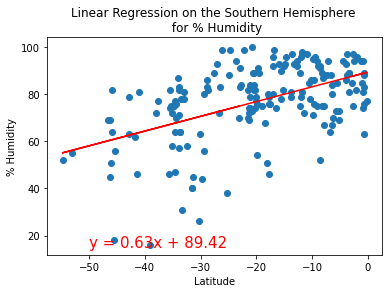

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

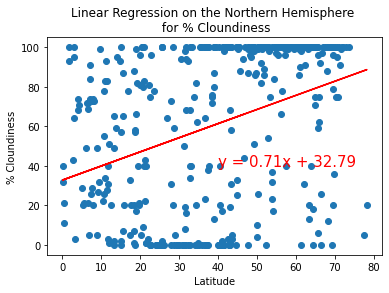

In [78]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloundiness', '% Cloundiness',(40,40))

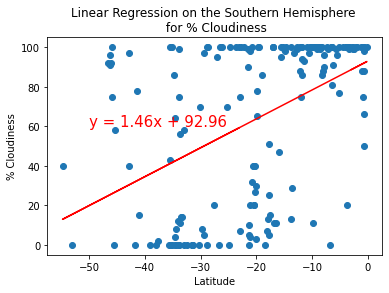

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

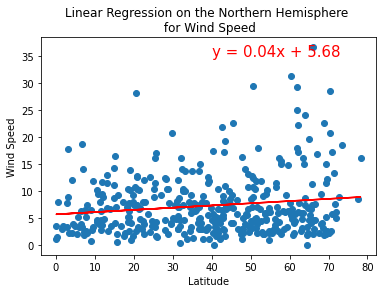

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

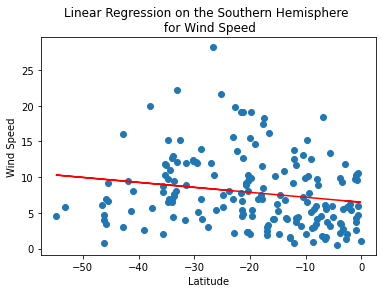

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))